In [16]:
# #CNN sample program

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt


# # Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Preprocess data
# # Reshape to (samples, height, width, channels)
# x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
# x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# # One-hot encode labels
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Build CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
#     MaxPooling2D((2,2)),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])


# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# # Evaluate on test data
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f"Test accuracy: {test_acc*100:.2f}%")

# model.save("model.h5")

In [17]:
from tensorflow.keras.models import load_model
new_model= load_model("model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted digit: 3
Prediction probabilities: [[8.1745852e-03 1.5837064e-05 1.8082048e-01 7.3982912e-01 2.4030752e-04
  2.3600547e-02 3.4605189e-05 4.3934450e-04 9.1165919e-03 3.7728544e-02]]

Top 3 predictions:
  Digit 3: 73.98%
  Digit 2: 18.08%
  Digit 9: 3.77%


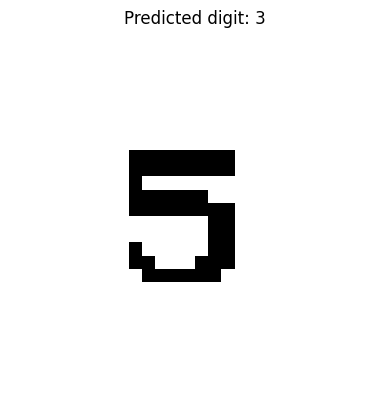

In [18]:
# Predict on a sample image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image (grayscale)
img = cv2.imread("Temp_DeepLearning.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Resize to 28x28
img = cv2.resize(img, (28, 28))

# 3. Invert colors (MNIST = white digit on black background)
img = 255 - img

# 4. Apply threshold to make it binary (cleaner)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 5. Normalize (0–255 → 0–1)
img = img / 255.0

# 6. Reshape for model (1,28,28,1)
sample_image = img.reshape(1, 28, 28, 1)

# 7. Predict
prediction = new_model.predict(sample_image)
predicted_class = np.argmax(prediction)

print("Predicted digit:", predicted_class)
print("Prediction probabilities:", prediction)
print("\nTop 3 predictions:")
top_3_indices = np.argsort(prediction[0])[-3:][::-1]
for idx in top_3_indices:
    print(f"  Digit {idx}: {prediction[0][idx]*100:.2f}%")

# 8. Display the preprocessed image
plt.imshow(img, cmap="gray")
plt.title(f"Predicted digit: {predicted_class}")
plt.axis("off")
plt.show()


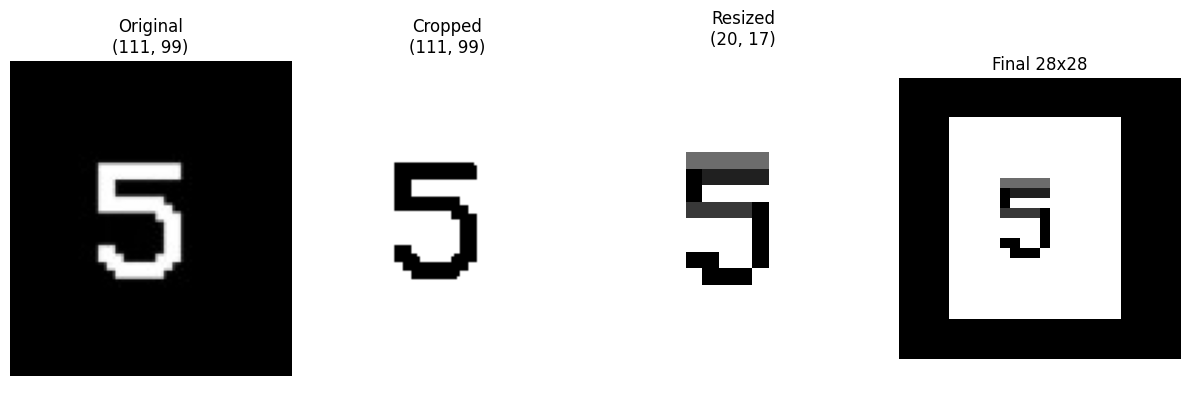

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

PREDICTED DIGIT: 2

Confidence scores:
  0:  4.10% ██
  1:  0.00% 
  2: 52.24% ██████████████████████████
  3:  0.21% 
  4:  7.23% ███
  5:  0.00% 
  6:  0.00% 
  7:  0.00% 
  8: 36.20% ██████████████████
  9:  0.01% 

ISSUE: The image quality/size causes distortion
Original size (111, 99) → 28x28 loses detail
Recommendation: Use a larger, clearer image


In [19]:
# OPTIMAL PREPROCESSING for handwritten digit recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load original image
original = cv2.imread("Temp_DeepLearning.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Invert colors (MNIST = white digit on black background)
inverted = 255 - original

# 3. Apply threshold with lower value to preserve more detail
_, binary = cv2.threshold(inverted, 80, 255, cv2.THRESH_BINARY)

# 4. Find the bounding box of the digit
coords = cv2.findNonZero(binary)
x, y, w, h = cv2.boundingRect(coords)

# 5. Crop with padding
padding = 5
x_start = max(0, x - padding)
y_start = max(0, y - padding)
x_end = min(binary.shape[1], x + w + padding)
y_end = min(binary.shape[0], y + h + padding)
cropped = binary[y_start:y_end, x_start:x_end]

# 6. Calculate target size maintaining aspect ratio (fit in 20x20)
h, w = cropped.shape
aspect = w / h
if aspect > 1:
    new_w = 20
    new_h = max(1, int(20 / aspect))
else:
    new_h = 20
    new_w = max(1, int(20 * aspect))

# 7. Resize with better interpolation
resized = cv2.resize(cropped, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

# 8. Center in 28x28 canvas
final_28x28 = np.zeros((28, 28), dtype=np.uint8)
y_offset = (28 - new_h) // 2
x_offset = (28 - new_w) // 2
final_28x28[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(original, cmap='gray')
plt.title(f"Original\n{original.shape}")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cropped, cmap='gray')
plt.title(f"Cropped\n{cropped.shape}")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(resized, cmap='gray')
plt.title(f"Resized\n{resized.shape}")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(final_28x28, cmap='gray')
plt.title("Final 28x28")
plt.axis('off')

plt.tight_layout()
plt.show()

# Normalize and predict
img_normalized = final_28x28 / 255.0
sample_image = img_normalized.reshape(1, 28, 28, 1)

prediction = new_model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f"\n{'='*50}")
print(f"PREDICTED DIGIT: {predicted_class}")
print(f"{'='*50}")
print("\nConfidence scores:")
for idx in range(10):
    bar = '█' * int(prediction[0][idx] * 50)
    print(f"  {idx}: {prediction[0][idx]*100:5.2f}% {bar}")

print(f"\n{'='*50}")
print(f"ISSUE: The image quality/size causes distortion")
print(f"Original size {original.shape} → 28x28 loses detail")
print(f"Recommendation: Use a larger, clearer image")
print(f"{'='*50}")
